In [1]:

import numpy as np

def normal_generator( n):
    # Parameters
    mean = 73
    std_dev = 30.2
    # Replace with the desired number of samples
    lower_limit = 0
    upper_limit = 142
    # Generate n samples from a normal distribution
    samples = np.random.normal(loc=mean, scale=std_dev, size=n)

    # Clip the samples to the specified range [lower_limit, upper_limit]
    samples = np.clip(samples, lower_limit, upper_limit)

    return samples

# Parameters


In [2]:
print(normal_generator(100))

[ 65.68597465  86.98301857  25.12956844  83.36309953  15.81354414
  94.58466838  83.40284414  62.23792465  70.53320289  41.47105455
  98.63373543  88.54004538   4.3864461  116.92181337 113.52786572
  82.74501227  59.866865    98.90268927  76.18784593  65.24483029
  27.31945889  76.07923002  48.87816316  54.84909837   9.39620365
  93.92570337  57.98048645  80.34133714 102.72624851  77.2479595
 103.96148538 114.53338202  56.22287877  68.67632464  64.08432091
 103.36119572 116.32394358  71.07416721  90.29219369  53.88621414
  47.53315231  71.27190446  87.99183006  58.40501045  78.46113628
  91.54039653  42.8945902  142.         107.26878063  85.92104412
 116.2787366   63.90392885  59.35836689  50.47900157  46.09778487
  46.46192666  98.98249412  41.87123546  74.22148314  76.54386152
  61.92936624  93.0324061   54.9811537  127.64263246  95.82988204
  50.93258838 105.86678452  85.18773623  71.30073252  54.61713703
  85.41907147  28.98835153  95.14995383  16.57573524   9.75400774
 104.060695

In [3]:
import math
def sample_generator(sample):
    arr = [0.03461954561846376, 0.02091597547782184, 0.012982329606923913, 0.007573025604038951, 0.0054093040028849616, 0.006851785070320947, 0.01226108907320591, 0.017309772809231867, 0.02524341868012982, 0.035701406419040745, 0.0439956725567977, 0.05301117922827262, 0.05878110349801659, 0.06130544536602957, 0.061666065632888574, 0.06274792643346555, 0.06419040750090155, 0.06851785070320952, 0.0714028128380815, 0.06959971150378651, 0.06527226830147854, 0.05733862243058059, 0.04688063469166967, 0.03642264695275875]

    for i in range(len(arr)):
        arr[i]=math.ceil(sample*arr[i])
    kr=[]
    for i in range(24):
        for k in range(arr[i]):
            kr.append(i)
    
    return arr

In [4]:
import math
def rectangle(q,d,t_start):
    
    arr=[0]*144
    
    def pulse(arr,q,t_start,t_stop):
        for i in range(t_start, t_stop):
            arr[i]=q+arr[i]
        return arr
    while d>0:
        if t_start+d<144:
            arr=pulse(arr,q,t_start,t_start+d)
            d=0
        else:
            arr=pulse(arr,q,t_start,144)
            d=d-(143-t_start)
            t_start=0
    
    return arr
        

In [5]:
print(rectangle(1,10,143))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [6]:

def lognormal_generator(sample, mean_lognormal):
    mu = np.log(mean_lognormal) - 0.5 * np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)
    sigma_squared = np.log(1 + (np.exp(1) - 1) / mean_lognormal**2)

# Calculate mean and variance of the lognormal distribution
    m = np.exp(mu + 0.5 * sigma_squared)
    v = (np.exp(sigma_squared) - 1) * np.exp(2 * mu + sigma_squared)

    data = np.random.lognormal(mean=mu, sigma=np.sqrt(sigma_squared), size=sample)
    
    return data

In [7]:
import numpy as np
d_=[1/70,1/56,1/32,1/8]
q_=[11.5,9.6,7.7,1.4]
def sum_sample(sample,d_mean,car_type):
    samples=normal_generator(sample)
    d_samples=lognormal_generator(sample,d_mean)
    ans=[0]*144

    for i in range(sample):
        pulse=rectangle(q_[car_type],int(np.round(d_mean*d_[car_type]*12)),int(samples[i]))
        for j in range(144):
            ans[j]=ans[j]+pulse[j]
    return ans 


In [8]:
print(sum_sample(50,11,0))

[46.0, 11.5, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 0, 0, 0, 11.5, 11.5, 11.5, 11.5, 0, 0, 0, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 0, 0, 11.5, 34.5, 23.0, 0, 0, 11.5, 11.5, 0, 23.0, 46.0, 46.0, 23.0, 0, 0, 11.5, 11.5, 11.5, 11.5, 0, 11.5, 23.0, 34.5, 57.5, 46.0, 11.5, 0, 11.5, 11.5, 0, 11.5, 11.5, 0, 11.5, 11.5, 11.5, 11.5, 11.5, 23.0, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 23.0, 11.5, 11.5, 23.0, 23.0, 11.5, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 11.5, 11.5, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.5, 23.0, 11.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34.5, 34.5]


In [9]:
import pandas as pd
data = pd.read_csv('ridership data.csv')
dict={}
data=data.to_numpy()
for i in range(len(data)) :
    area=data[i][0]
    area_dist=data[i][1]
    dict[area]=area_dist
names =['Civil Lines', 'Gandhi Nagar', 'Chanakyapuri', 'Alipur', 'Karawal Nagar', 'Kanjhawala', 'Seemapuri', 'Hauz Khas', 'Defence Colony', 'Dwarka', 'Patel Nagar', 'Karol Bagh', 'Mayur Vihar', 'Delhi Cantonment', 'Model Town', 'Seelampur', 'Rohini', 'Shahdara', 'Mehrauli', 'Kalkaji', 'Kapashera', 'Punjabi Bagh', 'Kotwali', 'Preet Vihar', 'Vasant Vihar', 'Narela', 'Yamuna Vihar', 'Saraswati Vihar', 'Vivek Vihar', 'Saket', 'Sarita Vihar', 'Najafgarh', 'Rajouri Garden']

In [10]:
print(dict)

{'Civil Lines': 11.9, 'Karol Bagh': 11.2, 'Kotwali': 10.9, 'Gandhi Nagar': 10.6, 'Mayur Vihar': 10.3, 'Preet Vihar': 10.1, 'Chanakyapuri': 9.9, 'Delhi Cantonment': 9.7, 'Vasant Vihar': 9.6, 'Alipur': 9.4, 'Model Town': 9.3, 'Narela': 9.1, 'Karawal Nagar': 9.0, 'Seelampur': 8.8, 'Yamuna Vihar': 8.7, 'Kanjhawala': 8.6, 'Rohini': 8.5, 'Saraswati Vihar': 8.4, 'Seemapuri': 8.3, 'Shahdara': 8.2, 'Vivek Vihar': 8.1, 'Hauz Khas': 8.0, 'Mehrauli': 7.9, 'Saket': 7.8, 'Defence Colony': 7.7, 'Kalkaji': 7.6, 'Sarita Vihar': 7.5, 'Dwarka': 7.3, 'Kapashera': 7.2, 'Najafgarh': 7.1, 'Patel Nagar': 7.0, 'Punjabi Bagh': 6.9, 'Rajouri Garden': 6.8}


In [11]:
def add_arrays(array1, array2):
    # Check if the arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length for addition.")
    
    # Use a list comprehension to add corresponding elements
    result_array = [x + y for x, y in zip(array1, array2)]
    
    return result_array

In [12]:

def load_profile(sample_array):
    load_final=[]
    for i in range(len(names)):
        profile_i=[0]*144
        d=dict[names[i]]
        for j in range(4):
            sample=sample_array[i][j]
            profile_i=add_arrays(sum_sample(sample,d,j),profile_i)
        load_final.append(profile_i)
    return load_final

In [13]:
sum_sample(631,9.7,0)

[149.5,
 57.5,
 0,
 0,
 23.0,
 34.5,
 11.5,
 23.0,
 34.5,
 46.0,
 46.0,
 11.5,
 11.5,
 23.0,
 34.5,
 23.0,
 23.0,
 46.0,
 46.0,
 57.5,
 46.0,
 23.0,
 11.5,
 0,
 23.0,
 57.5,
 34.5,
 0,
 57.5,
 57.5,
 57.5,
 92.0,
 80.5,
 80.5,
 92.0,
 103.5,
 92.0,
 69.0,
 92.0,
 184.0,
 195.5,
 115.0,
 69.0,
 92.0,
 92.0,
 149.5,
 149.5,
 69.0,
 92.0,
 92.0,
 92.0,
 103.5,
 115.0,
 149.5,
 138.0,
 172.5,
 230.0,
 195.5,
 184.0,
 195.5,
 184.0,
 195.5,
 149.5,
 184.0,
 241.5,
 253.0,
 218.5,
 207.0,
 207.0,
 138.0,
 184.0,
 149.5,
 138.0,
 195.5,
 241.5,
 195.5,
 149.5,
 195.5,
 149.5,
 172.5,
 184.0,
 184.0,
 161.0,
 103.5,
 138.0,
 138.0,
 126.5,
 138.0,
 184.0,
 184.0,
 138.0,
 149.5,
 218.5,
 264.5,
 253.0,
 161.0,
 46.0,
 69.0,
 126.5,
 126.5,
 115.0,
 126.5,
 115.0,
 92.0,
 103.5,
 103.5,
 138.0,
 218.5,
 149.5,
 69.0,
 57.5,
 46.0,
 57.5,
 69.0,
 57.5,
 69.0,
 103.5,
 126.5,
 161.0,
 103.5,
 46.0,
 46.0,
 80.5,
 69.0,
 69.0,
 92.0,
 46.0,
 34.5,
 92.0,
 69.0,
 0,
 11.5,
 46.0,
 34.5,
 11.5,
 11.

In [14]:
loaded_data = np.loadtxt('output_cars.txt', delimiter=' ').reshape(1000, 33, 4)


In [40]:
loaded_data = np.loadtxt('output.txt', delimiter=' ').reshape(1000, 33, 4)


In [15]:
import numpy as np
final_arr=[]
for i in range(1000):
# The original array
    original_array = np.array(loaded_data[i])

    # Convert the array to integers
    integer_array = original_array.astype(int)
    final_arr.append(integer_array)
# Print the resulting integer array
print(integer_array)

[[  1789   2393  41754  53941]
 [  1055   5660  22503  76771]
 [   972   8848   8525  15553]
 [  5493  15558  13898  22421]
 [  3724  10678  36997  18428]
 [  2812   8357  15065  29296]
 [  8092  12887  36631  34737]
 [   586   3475  20184  12501]
 [   631   7820   8283  25599]
 [  4944  21111  15885  69083]
 [   593  13639  21561  78534]
 [  1780  17184  33953  38606]
 [   619   2761  23595  40890]
 [  4423   4729  10175  24280]
 [ 11741  12641  49148  42159]
 [  3215  23302  66766 107285]
 [   644   7230  16817 205336]
 [  2129   1425  12503  95010]
 [   895  12740  38173  30435]
 [  5113   7322  16445  40893]
 [ 10849   9000  25820  25864]
 [  6558   3308  10420  67137]
 [ 13209  12361  37550  38028]
 [   500   1775  35746  74192]
 [  2837   5066  10556  30077]
 [ 10069   1242   4484 189194]
 [  2479   5388  28362  79740]
 [  8016   6128  33944  32410]
 [  2268   9075  18615  57208]
 [  6299  10882  23585  25537]
 [  4611  18839  21078  25561]
 [  7024    910  41043 154732]
 [  2244

In [16]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

3147084


In [17]:
print(final_arr[93])

[[ 18430   5732  32865  55017]
 [  1466   6027  17838  78976]
 [  7076    976  14824  22464]
 [   500   9865  17411  16028]
 [  4322  20366   9656  53347]
 [  1414  16264   5152  38205]
 [ 14829   3543  27523  23451]
 [  7568   8532   4586  32272]
 [  7621   8177   4430  28488]
 [   541  13301  32229  44080]
 [  2894   9818  65377  50332]
 [   689  13056  40506  50649]
 [  1028  24142  39488  35406]
 [  2426   6798   1504  28236]
 [  3074   2404  20711  67246]
 [   952  15693  37683  25592]
 [   677   1231  10838 184747]
 [  9436   8482  25081  64679]
 [ 12773   2257  40865  15892]
 [  1861  12507  21933  31759]
 [  4188   7820  27431   2381]
 [  1566   3091  38348  30046]
 [  2138   4163  31483  50341]
 [  1485   6537  45206  66406]
 [   535   3393  24777  21515]
 [ 10853  17083  48629 152675]
 [  4603  18715   8934 113729]
 [  3996   5632  10735  44110]
 [   802  11736  27462  71661]
 [   633   1597  13306  31566]
 [  2479  16452  16884  62338]
 [  3751   4376   8734 226498]
 [  1607

In [147]:
percentages = [ 1.32694089,  0.72670791,  0.2850466,   0.19668465]
for i in range(1000):
    for j in range(33):
        final_arr[i][j][0]=int(final_arr[i][j][0]*0.19668465)
        final_arr[i][j][1]=int(final_arr[i][j][1]*0.2850466)
        final_arr[i][j][2]=int(final_arr[i][j][2]*0.72670791)
        final_arr[i][j][3]=int(final_arr[i][j][3]*1.32694089)

In [49]:
s=0

for j in range(33):
    for k in range(4):
        s= s+ final_arr[0][j][k]
print(s)

3147084


In [291]:
res1=load_profile(integer_array)

In [292]:
print(res1)

[[11168.60000000005, 10661.000000000044, 10117.800000000036, 6618.200000000104, 4392.7000000001235, 4462.800000000119, 4341.000000000115, 4522.500000000113, 4441.1000000001095, 4557.900000000108, 4740.500000000106, 4904.700000000108, 5002.80000000011, 5054.300000000115, 5493.600000000115, 5719.700000000121, 6017.700000000123, 5884.500000000075, 5414.200000000046, 5713.700000000052, 6162.600000000055, 6376.200000000066, 6958.700000000068, 7657.300000000069, 7987.70000000008, 8588.600000000086, 8804.4000000001, 9259.90000000011, 9749.20000000012, 10172.500000000064, 10978.999999999987, 11355.399999999921, 12188.999999999844, 12943.799999999768, 13550.799999999697, 14384.6999999996, 14989.399999999525, 15502.29999999946, 16051.399999999401, 16398.799999999315, 16920.299999999253, 17581.099999999184, 17981.09999999912, 18720.79999999908, 19641.899999999034, 20783.499999999025, 21524.699999998964, 22370.09999999892, 22861.599999998856, 23044.499999998774, 24138.299999998744, 24811.699999998

In [ ]:
result_=[]
for j in range(200):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [19]:
result_=[]
for j in range(200,300):
    arr155= load_profile(final_arr[j])
    result_.append(arr155)
    

KeyboardInterrupt: 

In [ ]:
import multiprocessing
result=[]

def process_data(j, final_arr, result_list):
    arr155 = load_profile(final_arr[j])
    result_list.append(arr155)

if __name__ == '__main__':

    # Number of processes to run
    num_processes = multiprocessing.cpu_count()

    # Split the range into chunks
    chunk_size = (300 - 200) // num_processes
    chunks = [(i, min(i + chunk_size, 300)) for i in range(200, 300, chunk_size)]

    # Create a multiprocessing Manager to share result_list across processes
    manager = multiprocessing.Manager()
    result_list = manager.list()

    # Create processes
    processes = []
    for start, end in chunks:
        p = multiprocessing.Process(target=process_data, args=(start, final_arr, result_list))
        processes.append(p)

    # Start processes
    for p in processes:
        p.start()

    # Join processes
    for p in processes:
        p.join()

    # Convert shared list to regular list
    result_ = list(result_list)


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/apple/anaconda3/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/apple/anaconda3/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'process_data' on <module '__main__' (built-in)>


In [263]:
print(len(result_))

462


In [264]:
for j in range(463,501):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [280]:
for [p[] in range(501,600):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [281]:
for j in range(600,700):
    arr155 = load_profile(final_arr[j])
    result_.append(arr155)
    

In [283]:
print(len(result_))

778


In [284]:
import numpy as np
import matplotlib.pyplot as plt  
from matplotlib.ticker import FuncFormatter
def graph(area):
    arr_d12=[]
    for i in range(778):
        arr_d12.append(result_[i][area])
    # Generating random 2D array for demonstration purposes
    num_arrays = 1000
    array_length = 24

    # Replace this line with your actual data
    data = np.array(arr_d12)
    # Create a box plot for each 1D array across the 24 indexes
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

    # Customize the plot
    ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
    ax.set_xlabel('hours in 24 hr format')
    ax.set_ylabel('load in kW')

    # Add legend
    legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                       plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                       plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                       ]
    ax.legend(handles=legend_elements, loc='upper right')



    # Add mean, median, and quartile labels
    ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )
    ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                )


    plt.show()


In [241]:
arr_d12=[]
for i in range(200):
    arr_d12.append(result_[i][0])

TypeError: 'dict' object is not callable

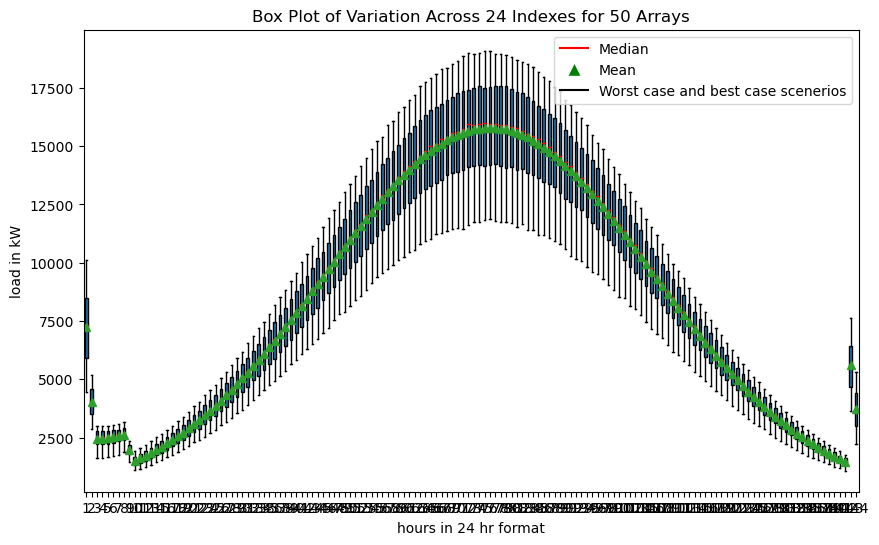

In [285]:
graph(0)

In [58]:
arr_d12=[]

TypeError: 'dict' object is not callable

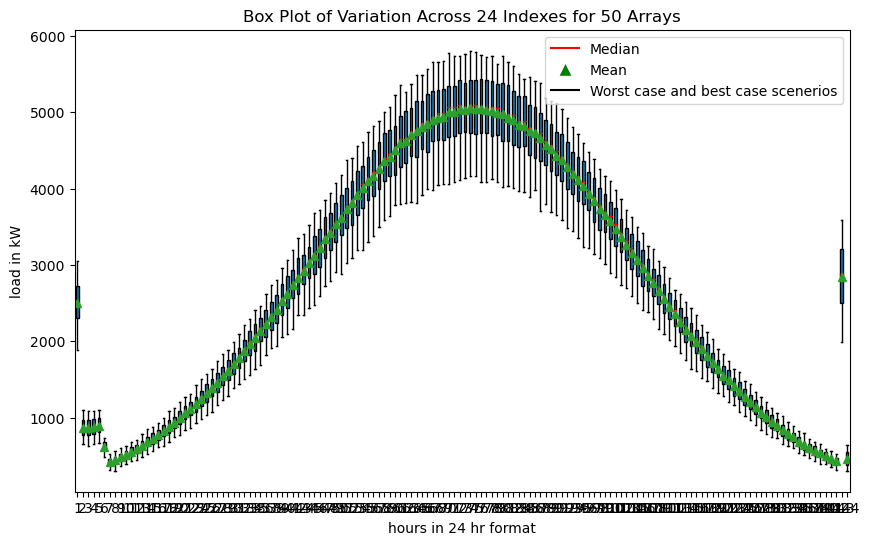

In [248]:
graph(8)

In [278]:
peak=[]
for i in range(500):
    peak.append(max(delhi[i]))

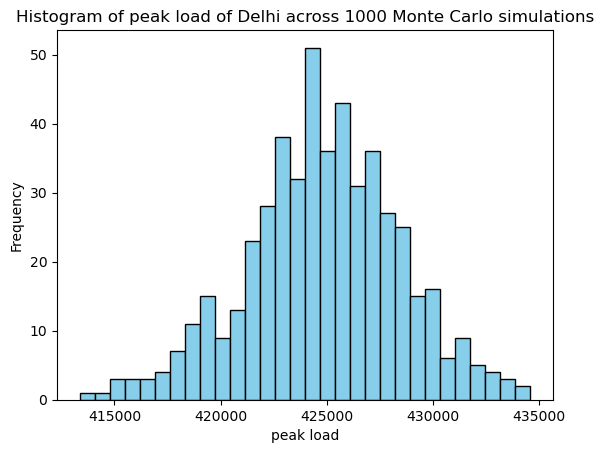

In [279]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'peak_load_data' with your actual 1D array
peak_load_data = np.array(peak)

# Create a histogram
plt.hist(peak_load_data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('peak load')
plt.ylabel('Frequency')
plt.title('Histogram of peak load of Delhi across 1000 Monte Carlo simulations' )

# Show the plot
plt.show()


In [90]:
print(len(arr_d1))

0


In [77]:
print(len(result_))

23


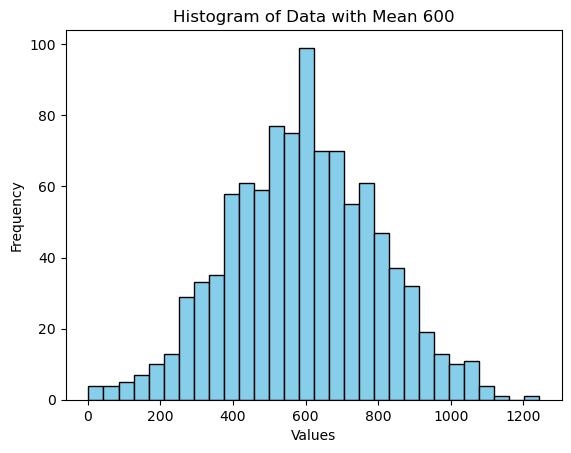

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with a mean of 600
data = np.random.normal(loc=600, scale=200, size=1000)

# Create a histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Mean 600')

# Show the plot
plt.show()


In [89]:
print(len(result_))

1000


In [286]:
delhi=[]
for i in range(778):
    arr=[0]*144
    for j in range(33):
        arr=add_arrays(arr,result_[i][j])
    delhi.append(arr)

TypeError: 'dict' object is not callable

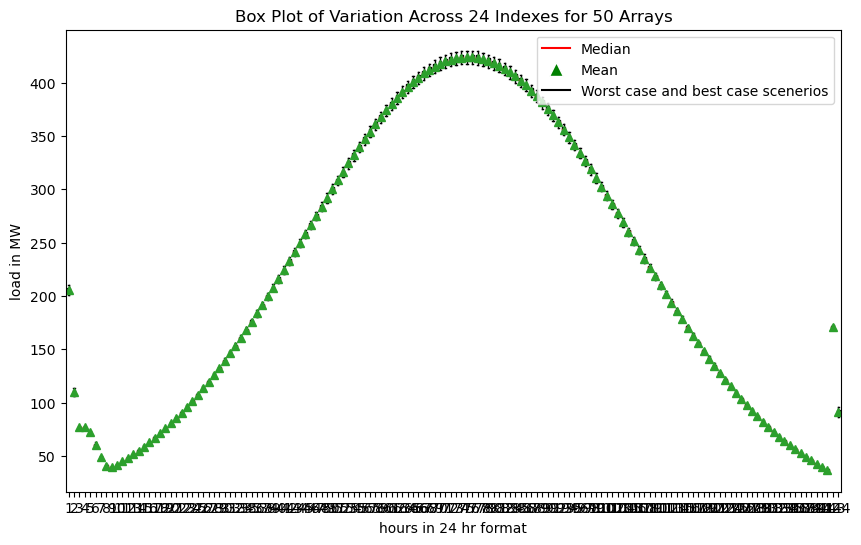

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Generating random 2D array for demonstration purposes
num_arrays = 1000
array_length = 24

# Replace this line with your actual data
data = np.array(delhi)
# Create a box plot for each 1D array across the 24 indexes
fig, ax = plt.subplots(figsize=(10, 6))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
boxplot = ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, medianprops={'color': 'red'}, showfliers=False, whis=[5, 95])

# Customize the plot
ax.set_title('Box Plot of Variation Across 24 Indexes for 50 Arrays')
ax.set_xlabel('hours in 24 hr format')
ax.set_ylabel('load in MW')

# Add legend
legend_elements = [plt.Line2D([0], [0], color='red', label='Median'),
                   plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
                   plt.Line2D([0], [0], color='black', linestyle='-', label='Worst case and best case scenerios'),
                   ]
ax.legend(handles=legend_elements, loc='upper right')



# Add mean, median, and quartile labels
ax.annotate('Mean', xy=(1, boxplot['means'][0]), xytext=(2, boxplot['means'][0] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Median', xy=(1, np.median(data)), xytext=(2, np.median(data) ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q1', xy=(1, boxplot['whiskers'][0].get_ydata()[1]), xytext=(2, boxplot['whiskers'][0].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )
ax.annotate('Q3', xy=(1, boxplot['whiskers'][1].get_ydata()[1]), xytext=(2, boxplot['whiskers'][1].get_ydata()[1] ),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            )


plt.show()


In [276]:
print(delhi[0])

[202272.30000000034, 108361.70000000113, 75661.20000000118, 76180.20000000122, 70971.00000000106, 58913.900000000765, 47033.7000000004, 39555.700000000026, 39477.299999999945, 40774.29999999996, 44580.89999999999, 47680.90000000002, 51232.90000000007, 54536.70000000009, 57700.20000000014, 62557.40000000023, 67613.80000000031, 71184.70000000038, 75441.30000000048, 79691.00000000057, 85039.20000000071, 89652.8000000008, 94866.80000000092, 100882.30000000107, 106693.7000000012, 112537.9000000013, 118302.60000000137, 122664.90000000139, 131144.90000000136, 139004.60000000134, 146482.90000000125, 152704.5000000011, 160201.2000000008, 166936.2000000006, 174289.0000000003, 181289.59999999995, 189802.69999999946, 196263.39999999906, 205727.99999999863, 214590.9999999981, 223050.69999999763, 230769.09999999707, 240331.2999999965, 247631.09999999596, 255432.59999999544, 262746.3999999949, 271747.2999999942, 281158.4999999934, 290466.2999999928, 297598.5999999923, 305639.59999999154, 313257.79999

In [288]:
import numpy as np

# Assuming your 3D array is named 'three_d_array'
# and it has the shape (1000, rows, columns)
# Replace 'three_d_array' with the actual name of your array

# Example: Creating a dummy 3D array with shape (1000, 3, 3)
three_d_array = np.array(result_)

# Define the filename for the text file
file_path = 'output_loadprofile_144.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate through each 2D array in the 3D array
    for i in range(three_d_array.shape[0]):
        # Convert the 2D array to a string
        array_str = np.array2string(three_d_array[i], separator=', ', precision=2, suppress_small=True)

        # Write the string representation of the 2D array to the file
        file.write(f"Array {i + 1}:\n")
        file.write(array_str)
        file.write('\n\n')


In [271]:
a=[]
for i in range(33):
    arr_ai=[]
    for i in range(500):
        arr_ai.append(result_[i][j])
    a.append(arr_ai)
        
    

In [272]:
print(a[3][100])

[4761.800000000047, 2050.900000000043, 2183.3000000000416, 2175.2000000000435, 1359.3999999999905, 782.899999999998, 733.699999999998, 809.7999999999972, 935.2999999999968, 1092.7999999999965, 1120.6999999999957, 1143.5999999999954, 1216.6999999999944, 1254.099999999994, 1398.9999999999927, 1598.0999999999926, 1562.6999999999912, 1675.499999999991, 1863.1999999999903, 1870.999999999989, 1821.7999999999906, 2364.699999999998, 2161.2, 2468.900000000007, 2449.200000000011, 2496.400000000015, 2751.4000000000206, 2971.9000000000283, 3127.7000000000353, 3194.2000000000403, 3386.8000000000447, 3409.0000000000523, 4127.300000000061, 4322.300000000069, 4174.700000000077, 4365.200000000085, 4664.300000000094, 4697.300000000096, 4815.600000000102, 5161.000000000109, 5308.8000000001175, 5531.200000000123, 5463.80000000013, 6110.100000000133, 6010.000000000136, 6287.800000000143, 6398.800000000148, 6663.100000000155, 6682.100000000163, 7298.900000000171, 7496.300000000169, 7436.100000000174, 7686.0

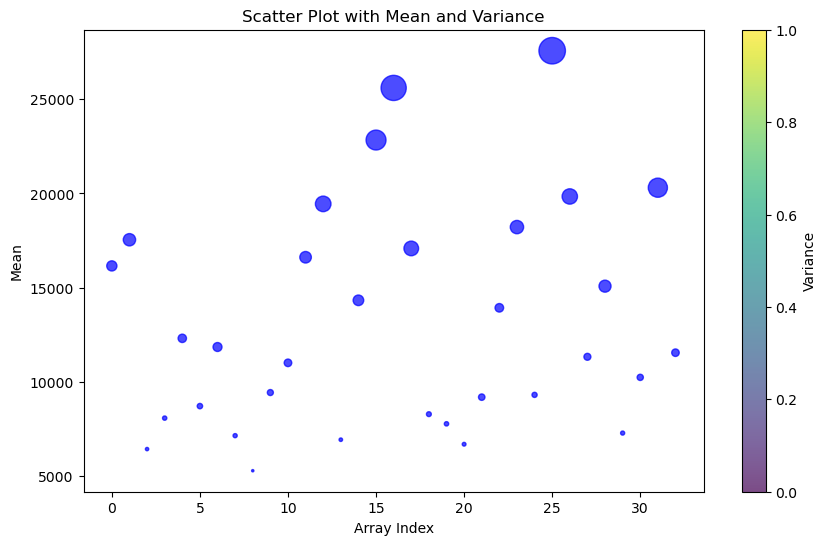

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 33 1D arrays with 1000 elements each
# Replace 'data' with your actual data

# Example: Creating dummy data
data = np.array(a_max)
# Calculate mean and variance for each 1D array
mean_values = np.mean(data, axis=1)
variance_values = np.var(data, axis=1)

# Plot scatter plot with mean as y-axis and variance as point size
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mean_values)), mean_values, s=variance_values/100000, c='blue', alpha=0.7)

# Set labels and title
plt.title('Scatter Plot with Mean and Variance')
plt.xlabel('Array Index')
plt.ylabel('Mean')
plt.colorbar(label='Variance')

plt.show()


In [274]:
print(mean_values)

[16156.9145 17544.3115  6440.857   8083.694  12315.29    8720.224
 11855.4615  7153.262   5293.075   9439.611  11015.407  16615.6585
 19446.711   6938.6    14331.8485 22832.7225 25597.4045 17083.902
  8292.942   7780.5285  6698.004   9195.43   13934.494  18216.2915
  9316.4425 27570.736  19840.409  11335.363  15082.5105  7289.7165
 10244.9225 20305.27   11553.4905]


In [275]:
print(variance_values)

[ 5393972.65533916  7913574.93961725   581340.90505097   958755.46156397
  3650772.45399996  1522001.65432393  4172799.48926791   902248.21355596
   279899.21607501  1892901.41777894  2977012.0538507   6932653.18492721
 12607211.40447709   643968.28779997  5836068.78419756 20605555.32314121
 32901030.75604108 11147578.62239588  1229120.76563596   993187.38953774
   739311.891684    2165349.53739989  3804841.0494638   9234734.77717647
  1390051.50394375 36405981.78652564 12260669.52181778  2520093.83353107
  7536590.07153994   871507.05887776  2029726.05074354 19035970.60220217
  2933035.2184593 ]


In [74]:
print(result_[100][3])

[978.599999999989, 548.799999999996, 327.59999999999957, 226.8000000000006, 131.60000000000022, 187.60000000000045, 337.3999999999994, 499.79999999999677, 663.5999999999941, 1009.3999999999885, 1180.1999999999985, 1478.4000000000178, 1621.200000000027, 1682.800000000031, 1834.000000000041, 1699.6000000000322, 1906.8000000000457, 1961.4000000000492, 2002.0000000000518, 2009.0000000000523, 1800.4000000000387, 1629.6000000000276, 1313.200000000007, 1070.9999999999914]


In [252]:
a_max=[]
for i in range(33):
    a_m=[]
    for j in range(200):
        a_m.append(max(result_[j][i]))
    a_max.append(a_m)
        

In [81]:
print(a_max[0])

[4116.000000000183, 7037.799999999424, 5044.199999999942, 6465.199999999572, 6178.199999999647, 6159.999999999652, 6872.5999999994665, 2496.200000000084, 5732.999999999763, 4543.000000000072, 6901.999999999459, 6693.399999999513, 4288.200000000138, 5396.99999999985, 2660.0000000000946, 2105.6000000000586, 6481.999999999568, 5135.199999999918, 6103.999999999666, 3662.4000000001597, 3805.200000000169, 3670.8000000001603, 3673.6000000001604, 6640.199999999527, 6963.599999999443, 4291.000000000137, 4158.000000000172, 5017.5999999999485, 6078.799999999673, 6969.199999999441, 5081.999999999932, 6697.599999999512, 4673.200000000038, 6953.799999999445, 7012.59999999943, 6010.199999999691, 4888.799999999982, 3199.0000000001296, 3740.800000000165, 3754.8000000001657, 6238.399999999631, 4634.000000000048, 4947.599999999967, 6974.79999999944, 6353.1999999996015, 6017.199999999689, 3698.800000000162, 3661.0000000001596, 4114.600000000183, 5066.599999999936, 6990.199999999436, 4663.400000000041, 643

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming you have the load data in a 1D array named 'load_data'
# Replace 'load_data' with your actual array

# Example: Creating dummy load data
load_data = np.random.randint(50, 200, 144)  # Replace with your actual load data

# Create a time array representing 10-minute intervals
time_array = np.arange(0, 144) * 10

# Convert the time array to datetime objects
start_time = datetime.strptime("00:00", "%H:%M")
time_objects = [start_time + timedelta(minutes=int(time)) for time in time_array]

# Format the datetime objects to display only the hours
hour_labels = [time.strftime('%H:%M') for time in time_objects if time.minute == 0]

# Plot the load data
plt.plot(hour_labels, load_data[:len(hour_labels)], marker='o', linestyle='-', color='b')
plt.title('City Load Every 10 Minutes')
plt.xlabel('Time (Continental time format, hours only)')
plt.ylabel('Load')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()
